In [3]:

import matplotlib.pylab as plt
import numpy as np 



In [6]:
import sys
try:
    del sys.modules['Funcs']
except: pass
from Funcs import *
from poisson_solver import SOR_solver
N       = 50
M       = 50
Lx      = 0.002
Ly      = 0.002
Lslot   = 0.0005
Lcoflow = 0.0005
dt= 10**-6
nu =10**-4
dx = Lx/N
dy = Ly/N
Ns_c = int(Lslot          /dx) #N for the point between the slot and te coflow
Nc_lw= int((Lslot+Lcoflow)/dx) #N for the point between the coflow and the rest of the wall
flow = 1# the speed of the entering fluid

# u = np.random.random((N+4,M+4))
# v = np.random.random((N+4,M+4))

u =np.ones((N,M)) * 0
v =np.ones((N,M)) * 0
u[int((N+4)*1/4):int((N+4)*3/4),int((M+4)*1/4):int((M+4)*3/4)] = 1
v[int((N+4)*1/4):int((N+4)*3/4),int((M+4)*1/4):int((M+4)*3/4)] = 0

def set_boundary(u,v,flow_rate = flow):
    #vertical barrier
    u[0,:] = 0 
    v[0,:] = v[1,:]  
    #gas in 
    u[:Nc_lw,0  ] = 0       
    u[:Nc_lw,M-1] = 0        
    v[:Nc_lw,0  ] =  flow
    v[:Nc_lw,M-1] = -flow
    #lateral barrier
    u[Nc_lw:,0  ] = 0 #u[Nc_lw:,1  ]       
    v[Nc_lw:,0  ] = 0       
    u[Nc_lw:,M-1] = 0 #u[Nc_lw:,M-2]
    v[Nc_lw:,M-1] = 0                

    #outgoing gaz
    u[M-1,:] = u[M-2,:]
    return u,v  
u,v = set_boundary(u,v,flow_rate=flow)

ures = [u]
vres = [v]
for i in range(10000):
    res = u_dir(ures[-1],vres[-1],dx,dy,dt,nu)
    res[0],res[1]=set_boundary(res[0],res[1],flow_rate=flow)
    # b = dx**2/dt*(df1_2(res[0],dx,axis=0)+df1_2(res[1],dy,axis=1))
    # print(i)
    # p = SOR_solver(b)
    # u = res[0] -dt * df1_2(p,dx,axis=0)
    # v = res[1] -dt * df1_2(p,dy,axis=1)
    ures.append(res[0])
    vres.append(res[1])

ures = np.array(ures)
vres = np.array(vres)

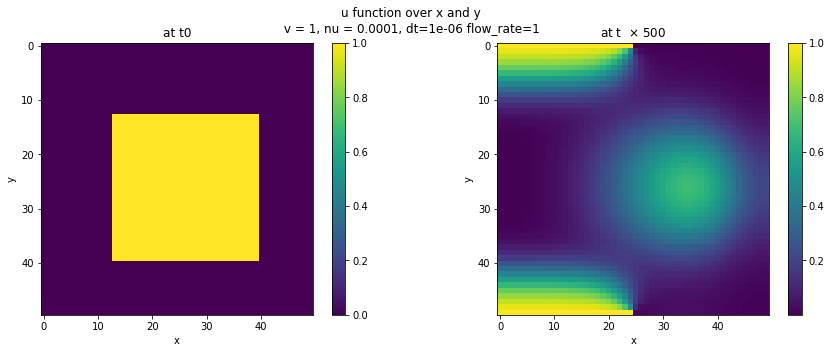

In [280]:
numplot = 500
fig, [ax1,ax2]=plt.subplots(1,2)
im1=ax1.imshow(np.abs(ures[0]).T)
fig.colorbar(im1, ax=ax1)
ax1.set_title("at t0")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

im2=ax2.imshow((ures[numplot]**2+vres[numplot]**2).T)
fig.colorbar(im2, ax=ax2)
ax2.set_title(r"at t  $\times$ "+"{}".format(numplot))
fig.suptitle('u function over x and y \n v = 1, nu = {}, dt={} flow_rate={}  '.format(nu,dt,flow))
ax2.set_xlabel("x")
ax2.set_ylabel("y")
fig.set_size_inches(15,5)

plt.savefig("img_dt={}_nu={}, flow_rate={}.jpg".format(dt,nu,flow))


In [ ]:
import sys
try:
    del sys.modules['Funcs']
except: pass
from Funcs import *
data_cube = np.abs(ures)
i=0
fig = plt.figure()
im = plt.imshow(data_cube[0], animated=True,cmap="jet")
plt.colorbar()
def updatefig(*args):
    global data_cube,i
    i=i+10 if i<len(data_cube)-10 else 0
    im.set_array(data_cube[i])
    return im,
save(data_cube,update_func=updatefig,fig=fig,Dt=1000*dt,dt=dt,file_type="avi")


10001
./animation_12.avi


KeyboardInterrupt: 

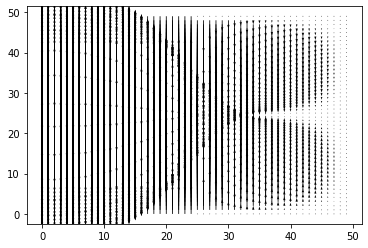

In [265]:
#quivering
import sys
try:
    del sys.modules['Funcs']
except: pass
from Funcs import *
X= np.zeros(N*M)
Y= np.zeros(N*M)
U= np.zeros((ures.shape[0],N*M))
V= np.zeros((vres.shape[0],N*M))

for i in range(N):
    for j in range(M):
        X[i+j*M] = i
        Y[i+j*M] = j
        U[:,i+j*M] = ures[:,i,j]
        V[:,i+j*M] = vres[:,i,j]

data_cube = [X,Y,U,V] 
print(data_cube[3].shape[0])   
i=0
fig = plt.figure()
im = plt.quiver(data_cube[0],data_cube[1],data_cube[2][0],data_cube[3][0],animated=True,units='inches')
def updatefig(i,im, X, Y):
    global data_cube
    i=i+1 if i<data_cube[3].shape[0] else 0

    im.set_UVC(data_cube[2][i],data_cube[3][i])
    return im,
save(data_cube,update_func=updatefig,fig=fig,Dt=1000*dt,dt=dt,file_type="avi",fargs=(im, X, Y))
fig.set_size_inches((15,12))

In [263]:
import pickle
pickle.dump( np.abs(vres), open( "ures.p", "wb" ) )